**DEFINING THE QUESTION**

To figure out how we can predict which individuals are most likely to have or use a bank account.

**SPECIFYING THE QUESTION**

1.Which areas has the most individuals with access to bank services?                                                                                                                             
2.Which gender has more individuals with a bak account?

3.How many people has access to bank services per country?


**DEFINING THE METRIC FOR SUCCESS**

Coming up with a model which will help in improving financial inclusion.

**UNDERSTANDING THE CONTEX**T

**RECORDING THE EXPERIMENTAL DESIGN**

The process taken for the analysis was;

1.Loading the data

2.Data cleaning-checking the data,dealing with null values and duplicates,renaming the columns.

3.Exploratory analysis;

   a.Univariate analysis and visualization

   b.Bivariate analysis and visualization

   c.Multivariate analysis and visualization

   d.Conclusion based on the analysis

**DATA RELEVANCE**

The data provided was correct and had enough information.

**READING THE DATA**

In [46]:
#Importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [47]:
#Loading the datasets /content/Financial Dataset - 1.csv
#importing the dataset

financial_df=pd.read_csv("/content/Financial Dataset - 1.csv")
financial_df.head()




,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


**CHECKING THE DATA**

In [48]:
financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [49]:
#checking the dataset columns
financial_df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [50]:
financial_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [51]:
#checking the information of the columns
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [52]:
financial_df.values

array([['Kenya', 2018, 'uniqueid_1', ..., 'Married/Living together',
        'Secondary education', 'Self employed'],
       ['Kenya', 2018, 'uniqueid_2', ..., 'Widowed',
        'No formal education', 'Government Dependent'],
       ['Kenya', 2018, 'uniqueid_3', ..., 'Single/Never Married',
        'Vocational/Specialised training', 'Self employed'],
       ...,
       ['Uganda', 2018, 'uniqueid_2115', ..., 'Widowed',
        'Primary education', 'Other Income'],
       ['Uganda', 2018, 'uniqueid_2116', ..., 'Divorced/Seperated',
        'Secondary education', 'Self employed'],
       ['Uganda', 2018, 'uniqueid_2117', ..., 'Single/Never Married',
        'Secondary education', 'No Income']], dtype=object)

In [53]:
#checking the type of our dataset
type(financial_df)

pandas.core.frame.DataFrame

In [54]:
#checking the number of rows and columns in our dataset
financial_df.shape

(23524, 13)

In [55]:
financial_df.describe

<bound method NDFrame.describe of       country  year  ...              Level of Educuation                Type of Job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education              Self employed
23523  Uganda  2018  ...       

**TYDYING THE DATASET**

In [56]:
financial_df.columns = ['country', 'year',	'unique_id', 'bank_account',	'location',	'cell_phone_access',	'household_size','respondent_age',	'respondent_gender',	'the_relationship_with_head', 'marital_status',	'level_of_educuation',	'type_of_Job']
financial_df.columns

Index(['country', 'year', 'unique_id', 'bank_account', 'location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'respondent_gender', 'the_relationship_with_head', 'marital_status',
       'level_of_educuation', 'type_of_Job'],
      dtype='object')

In [57]:
financial_df.head()

,country,year,unique_id,bank_account,location,cell_phone_access,household_size,respondent_age,respondent_gender,the_relationship_with_head,marital_status,level_of_educuation,type_of_Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [58]:
#checking for duplicates

financial_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23519    False
23520    False
23521    False
23522    False
23523    False
Length: 23524, dtype: bool

In [59]:
#checking for missing values
financial_df.isnull()

,country,year,unique_id,bank_account,location,cell_phone_access,household_size,respondent_age,respondent_gender,the_relationship_with_head,marital_status,level_of_educuation,type_of_Job
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,False,False,False,False,False,False,False,False,False,False,False,False,False
23520,False,False,False,False,False,False,False,False,False,False,False,False,False
23521,False,False,False,False,False,False,False,False,False,False,False,False,False
23522,False,False,False,False,False,False,False,False,False,False,False,False,False


In [60]:
#checking the sum of the missing data

financial_df.isnull().sum()

country                       14
year                           0
unique_id                      0
bank_account                  36
location                      15
cell_phone_access             11
household_size                28
respondent_age                34
respondent_gender             34
the_relationship_with_head     4
marital_status                32
level_of_educuation           29
type_of_Job                   30
dtype: int64

In [61]:
#dropping null values
financial_df.dropna(how='any').shape

(23343, 13)

In [62]:
financial_df.describe()

,year,household_size,respondent_age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


**EXPLORATORY ANALYSIS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


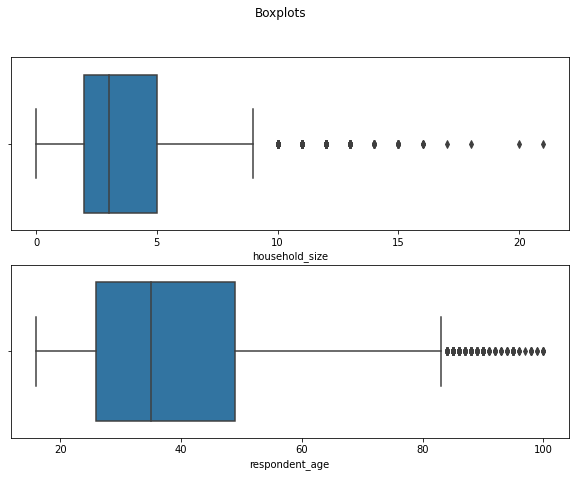

In [63]:
#checking for outliers

fig, (ax1, ax2)= plt.subplots(2,figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(financial_df['household_size'], ax=ax1)
sns.boxplot(financial_df['respondent_age'], ax=ax2)
plt.show()

In [64]:
#checking for anomalies using IQR

q1_household = financial_df['household_size'].quantile(.25)
q3_household = financial_df['household_size'].quantile(.75)

iqr_household = q3_household - q1_household

q1_respondent = financial_df['respondent_age'].quantile(.25)
q3_respondent = financial_df['respondent_age'].quantile(.75)

iqr_respondent = q3_respondent - q1_respondent

print(iqr_household, iqr_respondent)


3.0 23.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


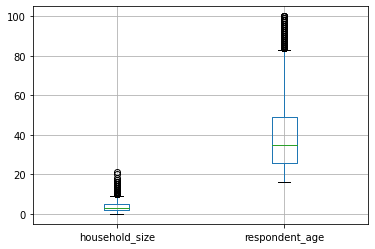

In [65]:
#checking for anomalies

financial_df.boxplot(column=['household_size', 'respondent_age'])



In [67]:
#Generating a frequency table from the categorical data from the financial dataset for respondent gender


financial_df.respondent_gender.value_counts()



Female    13859
Male       9631
Name: respondent_gender, dtype: int64

In [68]:
#frequency distribution for respondent age
financial_df.respondent_age.value_counts()

30.0     1052
35.0      834
25.0      790
28.0      747
32.0      714
         ... 
100.0       5
93.0        4
96.0        3
99.0        2
97.0        1
Name: respondent_age, Length: 85, dtype: int64

In [69]:
#frequency distribution for household size
financial_df.household_size.value_counts()

2.0     5132
1.0     3967
3.0     3535
4.0     3211
5.0     2727
6.0     2031
7.0     1383
8.0      741
9.0      356
10.0     192
12.0      66
11.0      66
0.0       36
13.0      25
15.0      11
14.0       9
16.0       4
18.0       1
20.0       1
21.0       1
17.0       1
Name: household_size, dtype: int64

In [70]:
#finding the measures of central tendency for respondent age column
print(f"age mean    :{financial_df['respondent_age'].mean()}")
print(f"age median  :{financial_df['respondent_age'].median()}")
print(f"age mode    :{financial_df['respondent_age'].mode()}")
print(f"age max     :{financial_df['respondent_age'].max()}")
print(f"age min     :{financial_df['respondent_age'].min()}")

age mean    :38.804299702000854
age median  :35.0
age mode    :0    30.0
dtype: float64
age max     :100.0
age min     :16.0


In [71]:
#finding the measures of central tendency for household size column
print(f"household size mean   :{financial_df['household_size'].mean()}")
print(f"household size median :{financial_df['household_size'].median()}")
print(f"household size mode   :{financial_df['household_size'].mode()}")
print(f"household size min    :{financial_df['household_size'].min()}")
print(f"household size max    :{financial_df['household_size'].max()}")

household size mean   :3.6818181818181817
household size median :3.0
household size mode   :0    2.0
dtype: float64
household size min    :0.0
household size max    :21.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


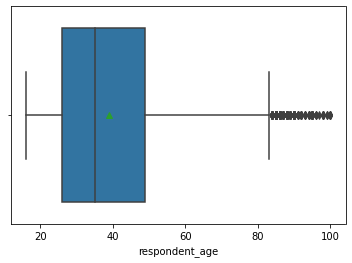

In [72]:
#creating the visualization for respond_age using a box plot
sns.boxplot(financial_df["respondent_age"], showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


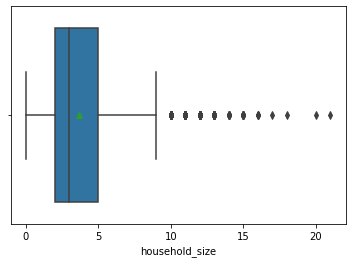

In [73]:
#showing the visualization of household_size using a boxplox
sns.boxplot(financial_df["household_size"], showmeans=True)

(array([10273.,  7483.,  3890.,  1603.,   241.]),
 array([ 16. ,  32.8,  49.6,  66.4,  83.2, 100. ]),
 <a list of 5 Patch objects>)

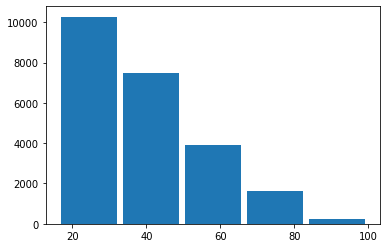

In [74]:
#plotting the univariate summaries of respondents age
plt.hist(financial_df['respondent_age'],bins=5, rwidth=0.9)

(array([1.5881e+04, 6.8820e+03, 6.8000e+02, 4.9000e+01, 4.0000e+00]),
 array([ 0. ,  4.2,  8.4, 12.6, 16.8, 21. ]),
 <a list of 5 Patch objects>)

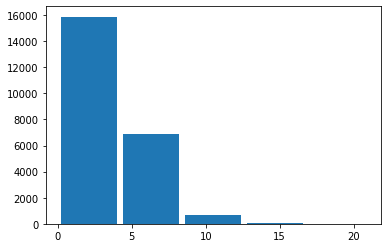

In [75]:
#plotting the univariate summaries of household size
plt.hist(financial_df['household_size'],bins=5, rwidth=0.9)

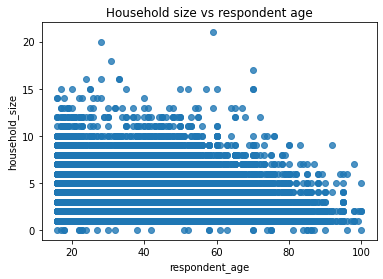

In [76]:


# Using Seaborn: Using the function regplot to create our scatterplot for household size vs respondent age

sns.regplot(x = financial_df["respondent_age"], y = financial_df["household_size"], fit_reg=False)

# Giving our scatterplot a title
plt.title('Household size vs respondent age')

# Labelling our x axis
plt.xlabel('respondent_age')

# Labelling our y axis
plt.ylabel('household_size')

# We then display our scatterplot
plt.show()



In [77]:

# Calculating the pearson coefficient
pearson_coeff = financial_df["household_size"].corr(financial_df["respondent_age"], method="pearson") 
print(pearson_coeff)

coeff = financial_df["household_size"].corr(financial_df["respondent_age"])
print(coeff)

-0.11970929714642327
-0.11970929714642327


In [78]:

#calculating the correlation coefficient
financial_df["respondent_age"].corr(financial_df["household_size"])
print(coeff)


-0.11970929714642327


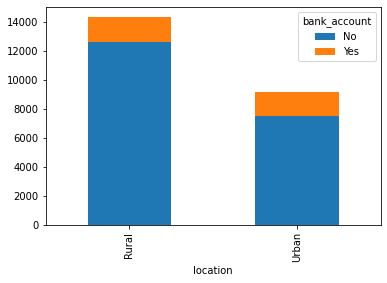

In [80]:
#a stacked bar graph showing individuals with a bank account per location based on gender
financial_df.groupby("location")['bank_account'].value_counts().unstack().plot.bar(stacked=True)

In [ ]:

financial_df.groupby("bank_account")['country'].value_counts().unstack().plot.bar(stacked=True)

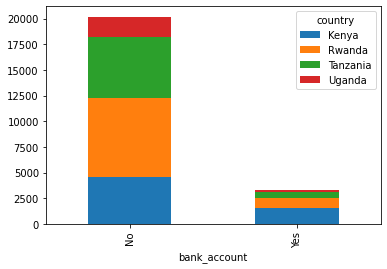

In [81]:
#stacked bar chart showing individuals with a bank account per country
financial_df.groupby("bank_account")['country'].value_counts().unstack().plot.bar(stacked=True)

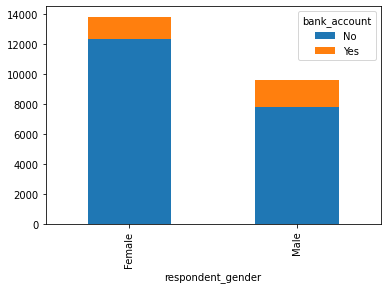

In [100]:

financial_df.groupby("respondent_gender")['bank_account'].value_counts().unstack().plot.bar(stacked=True)


In [84]:
df=financial_df.groupby("respondent_gender")['bank_account'].value_counts()


In [85]:
from scipy.stats import chi2_contingency

In [86]:
chi2_contingency(df)

(0.0, 1.0, 0, array([12356.,  1482.,  7793.,  1823.]))

In [87]:
df.head()

respondent_gender  bank_account
Female             No              12356
                   Yes              1482
Male               No               7793
                   Yes              1823
Name: bank_account, dtype: int64

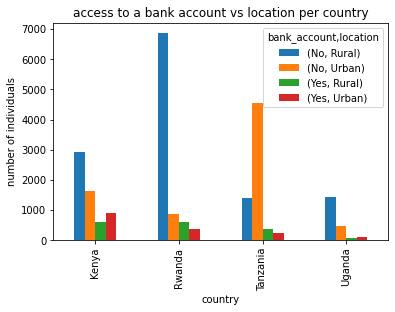

In [98]:


df=pd.crosstab(index=[financial_df['country']],columns=[financial_df['bank_account'],financial_df['location']])
df.plot.bar()
plt.title('access to a bank account vs location per country')
plt.ylabel('number of individuals')
plt.show()

**CONCLUSION**

From the analysis,we can see that the number of individuals without access to bank services is higher in rurals for all countries except in Tanzania where many people from urban had no access to bank services.

Also,the number of people without bank accounts is higher in rural areas than in urban areas.

Based on gender,more female had access to bank services compared to male.

Kenya had many individuals with a bank account followed by Rwanda then Tanzania and Uganda with the least people with a bank account.